In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import plotly.express as px
import geopandas as gpd
import networkx as nx
from gensim import corpora, models
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, GlobalMaxPooling1D
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import clone_model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv('/kaggle/input/tweets-on-common-wealth-games-2022/cwg.csv')

In [3]:
df.dropna(subset=['tweet'], inplace=True)

In [4]:
df['tweet_length'] = df['tweet'].apply(len)
fig = px.histogram(df, x='tweet_length', nbins=30, title='Tweet Length Distribution',
                   labels={'tweet_length': 'Tweet Length', 'count': 'Count'})
fig.show()

In [5]:
# Word Frequency Analysis (Plotly)
def plot_top_words(data, top_n=10):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data)
    word_freq = np.array(X.sum(axis=0))[0]
    words = np.array(vectorizer.get_feature_names_out())
    sorted_indices = np.argsort(word_freq)[::-1][:top_n]

    fig = px.bar(x=word_freq[sorted_indices], y=words[sorted_indices],
                 labels={'x': 'Frequency', 'y': 'Word'}, title=f'Top {top_n} Most Frequent Words')
    fig.show()

plot_top_words(df['tweet'], top_n=20)

In [6]:
# Word Cloud (Plotly)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['tweet']))
fig = px.imshow(wordcloud.to_array(), binary_string=True)
fig.update_layout(title='Word Cloud')
fig.show()

In [7]:
# Sentiment Analysis using Vader
sia = SentimentIntensityAnalyzer()
df['compound'] = df['tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')


In [8]:
# Plot Sentiment Distribution (Plotly)
sentiment_distribution = df['sentiment'].value_counts().reset_index()
sentiment_distribution.columns = ['sentiment', 'count']
fig = px.bar(sentiment_distribution, x='sentiment', y='count',
             labels={'sentiment': 'Sentiment', 'count': 'Count'},
             title='Sentiment Distribution')
fig.show()

In [9]:
pip install networkx==2.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
scikit-image 0.21.0 requires networkx>=2.8, but you have networkx 2.7.1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.5.1 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'username' and 'mentions' columns
edges = []
for i, mentions in enumerate(df['mentions']):
    if mentions:
        mentions_list = [mention.strip('@') for mention in mentions.split(',')]
        edges.extend([(df.at[i, 'username'], mention) for mention in mentions_list])

G = nx.Graph()
G.add_edges_from(edges)

pos = nx.circular_layout(G)

# Show the plot
plt.show()


In [11]:
# Topic Analysis (Gensim)
documents = df['tweet'].apply(lambda x: x.split())
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Display topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx + 1}: {topic}')

Topic 1: 0.036*"#CWG2022" + 0.023*"for" + 0.021*"in" + 0.020*"the" + 0.015*"at" + 0.012*"medal" + 0.012*"to" + 0.011*"of" + 0.010*"a" + 0.009*"India"
Topic 2: 0.033*"#CWG2022" + 0.023*"में" + 0.017*"के" + 0.013*"को" + 0.011*"ने" + 0.011*"की" + 0.011*"भारत" + 0.010*"#CommonwealthGames2022" + 0.008*"से" + 0.008*"का"
Topic 3: 0.036*"#CWG2022" + 0.035*"the" + 0.018*"to" + 0.018*"in" + 0.014*"of" + 0.011*"and" + 0.011*"for" + 0.010*"#B2022" + 0.010*"a" + 0.008*"at"


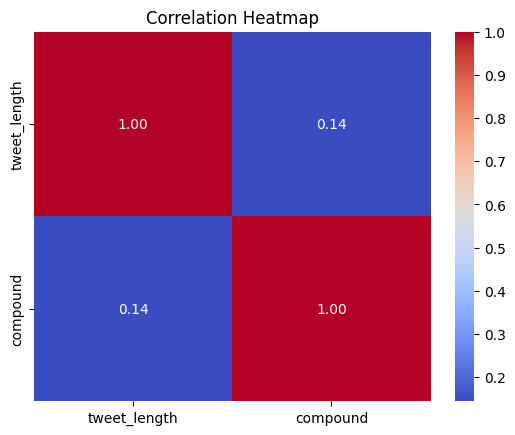

In [12]:
# Correlation Heatmap
correlation_matrix = df[['tweet_length', 'compound']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


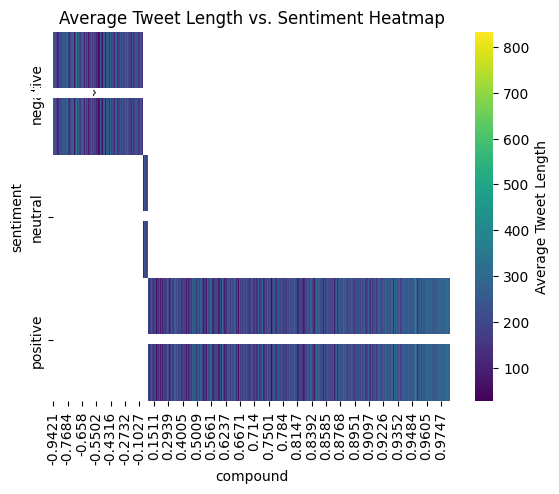

In [13]:
# Tweet Length vs. Sentiment Heatmap
sentiment_length_heatmap = df.pivot_table(index='sentiment', columns='compound', values='tweet_length', aggfunc='mean')
sns.heatmap(sentiment_length_heatmap, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Average Tweet Length'})
plt.title('Average Tweet Length vs. Sentiment Heatmap')
plt.show()

In [14]:
df.dropna(subset=['tweet', 'sentiment'], inplace=True)

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['sentiment'], test_size=0.2, random_state=42)


In [15]:
# Model 1: Logistic Regression
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

logistic_regression_test_preds = logistic_regression_model.predict(X_test_tfidf)
results_df = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': logistic_regression_test_preds
})

# Save the results to a CSV file
results_df.to_csv('logistic_regression_results.csv', index=False)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [16]:
# Model 2: Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)
decision_tree_test_preds = decision_tree_model.predict(X_test_tfidf)
results_df = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': decision_tree_test_preds
})

# Save the results to a CSV file
results_df.to_csv('decision_tree_results.csv', index=False)

In [17]:
# Model 4: Gradient Boosting
gradient_boost_model = GradientBoostingClassifier()
gradient_boost_model.fit(X_train_tfidf, y_train)
gradient_boost_test_preds = gradient_boost_model.predict(X_test_tfidf)
results_df = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': gradient_boost_test_preds
})

# Save the results to a CSV file
results_df.to_csv('gradient_boost_results.csv', index=False)


In [18]:
# Model 5: Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_test_preds = svm_model.predict(X_test_tfidf)
results_df = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': svm_test_preds
})

# Save the results to a CSV file
results_df.to_csv('svm_results.csv', index=False)

In [19]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=100, padding='post', truncating='post')

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [21]:
# Model 6: Convolutional Neural Network (CNN)
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_pad, y_train_encoded, epochs=3, validation_data=(X_test_pad, y_test_encoded))
cnn_test_preds = (cnn_model.predict(X_test_pad) > 0.5).astype(int).flatten()
results_df = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': cnn_test_preds
})

# Save the results to a CSV file
results_df.to_csv('cnn_results.csv', index=False)

Epoch 1/3
877/877 [==============================] - 43s 45ms/step - loss: -1847061.8750 - accuracy: 0.4175 - val_loss: -9428629.0000 - val_accuracy: 0.4174
Epoch 2/3
877/877 [==============================] - 9s 10ms/step - loss: -51847428.0000 - accuracy: 0.4176 - val_loss: -127858304.0000 - val_accuracy: 0.4174
Epoch 3/3
220/220 [==============================] - 0s 1ms/step


In [22]:
# Model 7: Artificial Neural Network (ANN)
ann_model = Sequential()
ann_model.add(Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_tfidf, y_train_encoded, epochs=3, validation_data=(X_test_tfidf, y_test_encoded))
ann_test_preds = (ann_model.predict(X_test_tfidf) > 0.5).astype(int).flatten()
results_df = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': ann_test_preds
})

# Save the results to a CSV file
results_df.to_csv('ann_results.csv', index=False)

Epoch 1/3
877/877 [==============================] - 36s 39ms/step - loss: -7811.7505 - accuracy: 0.4176 - val_loss: -32086.9688 - val_accuracy: 0.4174
Epoch 2/3
877/877 [==============================] - 8s 9ms/step - loss: -112059.3281 - accuracy: 0.4176 - val_loss: -229283.5625 - val_accuracy: 0.4174
Epoch 3/3
220/220 [==============================] - 1s 2ms/step


In [23]:
# Model 8: Recurrent Neural Network (RNN)
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
rnn_model.add(LSTM(64))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_pad, y_train_encoded, epochs=3, validation_data=(X_test_pad, y_test_encoded))
rnn_test_preds = (rnn_model.predict(X_test_pad) > 0.5).astype(int).flatten()
results_df = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': rnn_test_preds
})

# Save the results to a CSV file
results_df.to_csv('rnn_results.csv', index=False)

Epoch 1/3
877/877 [==============================] - 35s 38ms/step - loss: -16.9302 - accuracy: 0.4172 - val_loss: -29.6088 - val_accuracy: 0.4174
Epoch 2/3
877/877 [==============================] - 12s 13ms/step - loss: -41.7515 - accuracy: 0.4176 - val_loss: -54.1454 - val_accuracy: 0.4174
Epoch 3/3
220/220 [==============================] - 1s 3ms/step


In [24]:
#Model 10: DNN
from tensorflow.keras.layers import Dense, Embedding, Flatten
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=100, padding='post', truncating='post')
# Create a Deep Neural Network (DNN) model
dnn_model = Sequential()
dnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
dnn_model.add(Flatten())
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))
# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
dnn_model.fit(X_train_pad, y_train_encoded, epochs=3, validation_data=(X_test_pad, y_test_encoded))
# Evaluate the model
dnn_test_preds = (dnn_model.predict(X_test_pad) > 0.5).astype(int).flatten()
results_df = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': dnn_test_preds
})

# Save the results to a CSV file
results_df.to_csv('dnn_results.csv', index=False)

Epoch 1/3
877/877 [==============================] - 30s 32ms/step - loss: -211528.9375 - accuracy: 0.4178 - val_loss: -831872.3125 - val_accuracy: 0.4174
Epoch 2/3
877/877 [==============================] - 8s 9ms/step - loss: -2816828.0000 - accuracy: 0.4176 - val_loss: -5717156.0000 - val_accuracy: 0.4174
Epoch 3/3
220/220 [==============================] - 0s 1ms/step


In [25]:
# Model 3: LSTM
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=100, padding='post', truncating='post')
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train_encoded, epochs=3, validation_data=(X_test_pad, y_test_encoded))
lstm_test_preds = (lstm_model.predict(X_test_pad) > 0.5).astype(int).flatten()
results_df = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': lstm_test_preds
})

# Save the results to a CSV file
results_df.to_csv('lstm_results.csv', index=False)

Epoch 1/3
877/877 [==============================] - 35s 38ms/step - loss: -17.2916 - accuracy: 0.4172 - val_loss: -30.3539 - val_accuracy: 0.4183
Epoch 2/3
877/877 [==============================] - 11s 12ms/step - loss: -42.6436 - accuracy: 0.4183 - val_loss: -55.1859 - val_accuracy: 0.4183
Epoch 3/3
220/220 [==============================] - 1s 3ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



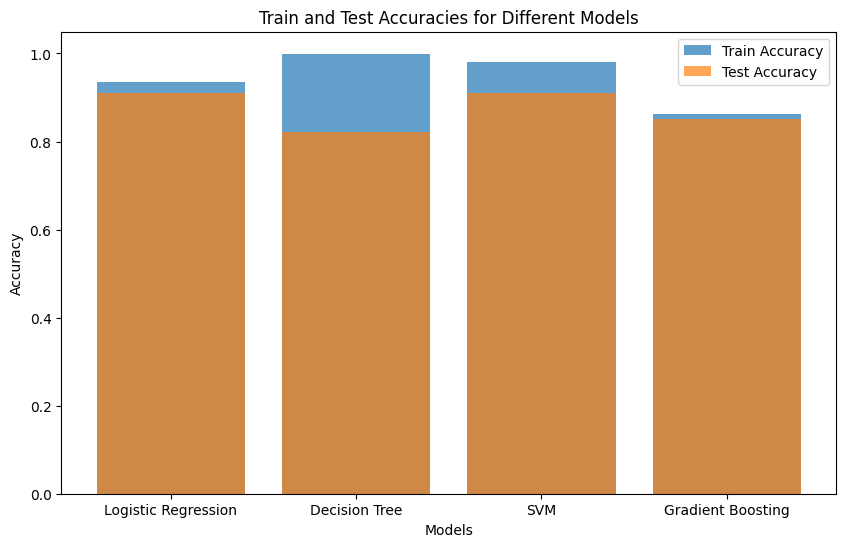

In [26]:
models = {
    'Logistic Regression': logistic_regression_model,
    'Decision Tree': decision_tree_model,
    'SVM': svm_model,
    'Gradient Boosting': gradient_boost_model
}

train_accuracies = []
test_accuracies = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Predictions on train and test sets
    train_preds = model.predict(X_train_tfidf)
    test_preds = model.predict(X_test_tfidf)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), train_accuracies, label='Train Accuracy', alpha=0.7)
plt.bar(models.keys(), test_accuracies, label='Test Accuracy', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies for Different Models')
plt.legend()
plt.show()

In [27]:
def evaluate_model(model, X_train, y_train, X_test, y_test, epochs=3):
    # Clone the model
    model_clone = model

    # Lists to store training and testing accuracies
    train_accuracies = []
    test_accuracies = []

    # Train the model
    for epoch in range(epochs):
        model_clone.fit(X_train, y_train, epochs=1, verbose=0)

        # Evaluate on training data
        train_preds = (model_clone.predict(X_train) > 0.5).astype(int).flatten()
        train_acc = accuracy_score(y_train, train_preds)
        train_accuracies.append(train_acc)

        # Evaluate on testing data
        test_preds = (model_clone.predict(X_test) > 0.5).astype(int).flatten()
        test_acc = accuracy_score(y_test, test_preds)
        test_accuracies.append(test_acc)

    return train_accuracies, test_accuracies

def evaluate_and_plot(model, X_train, y_train, X_test, y_test, model_name, epochs=3):
    train_accuracies, test_accuracies = evaluate_model(model, X_train, y_train, X_test, y_test, epochs)

    # Plot training and testing accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(test_accuracies, label='Testing Accuracy')
    plt.title(f'{model_name} Training and Testing Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

220/220 [==============================] - 1s 3ms/step


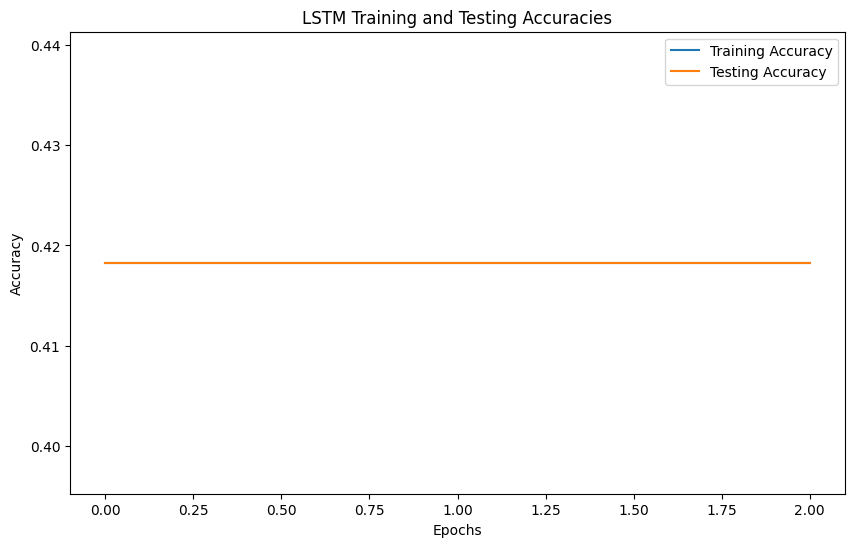

220/220 [==============================] - 0s 1ms/step


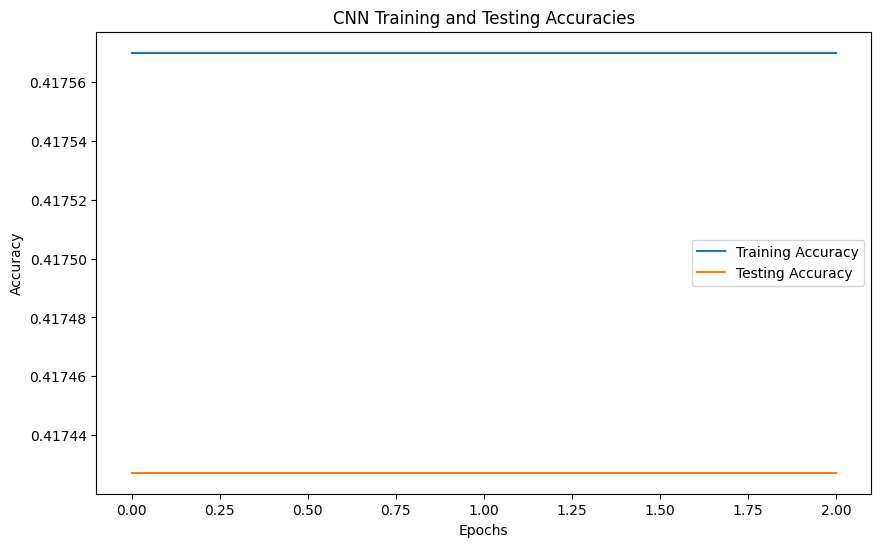

220/220 [==============================] - 0s 2ms/step


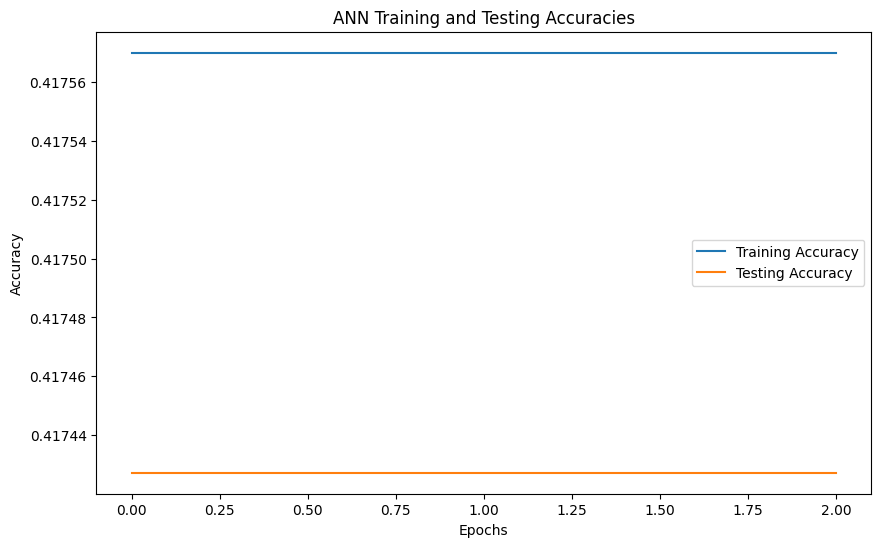

220/220 [==============================] - 1s 3ms/step


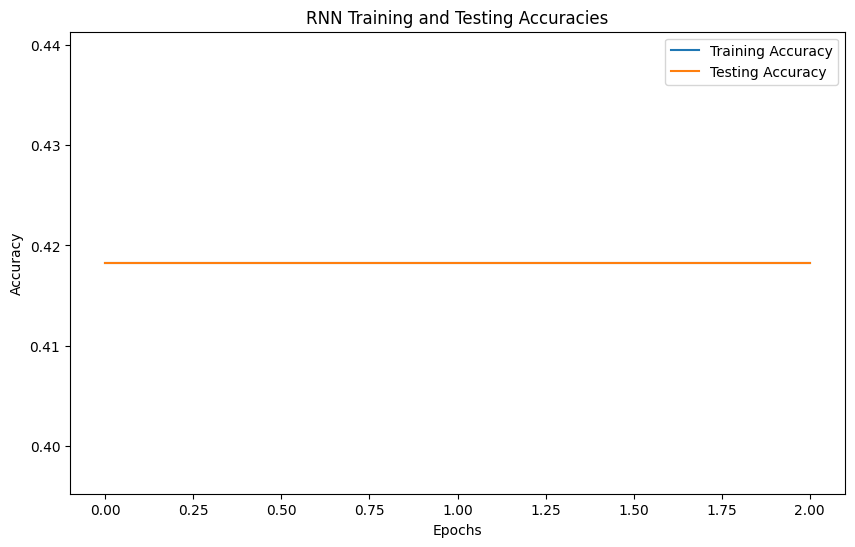

220/220 [==============================] - 0s 1ms/step


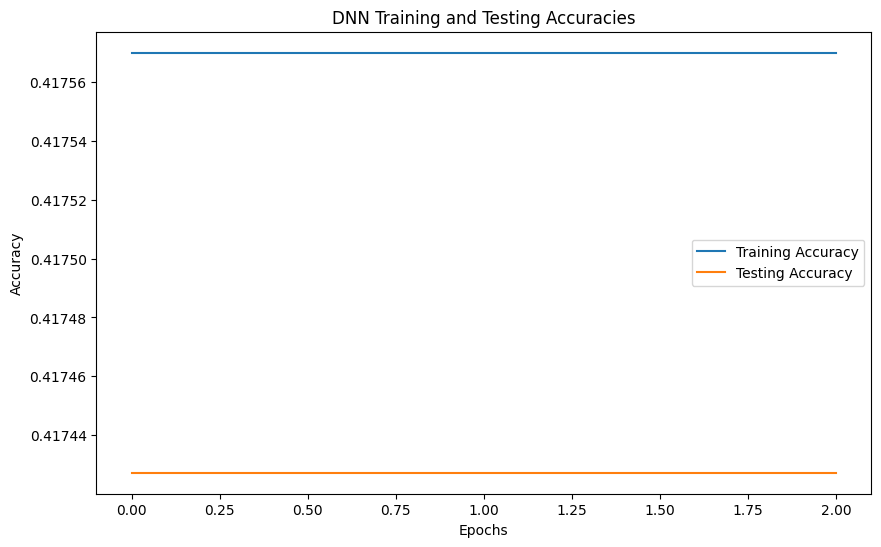

In [28]:
evaluate_and_plot(lstm_model, X_train_pad, y_train_encoded, X_test_pad, y_test_encoded, 'LSTM')
evaluate_and_plot(cnn_model, X_train_pad, y_train_encoded, X_test_pad, y_test_encoded, 'CNN')
evaluate_and_plot(ann_model, X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded, 'ANN')
evaluate_and_plot(rnn_model, X_train_pad, y_train_encoded, X_test_pad, y_test_encoded, 'RNN')
evaluate_and_plot(dnn_model, X_train_pad, y_train_encoded, X_test_pad, y_test_encoded, 'DNN')